# Test plan

#### cases
- directed
    - weighted
    - unweighted
- undirected
    - weighted
    - unweighted

#### tests needed
- make sure objects are correct shape/size/type
- make sure exceptions get properly raised
- given some embedding from a matrix B (with same weights everywhere, true generative matrix), make sure latent positions are in proper location

#### things users could do:
- pass original matrix into predict method
- pass augmented matrix into predict method
- forget to fit
- pass list as y (or any other type)
- call fit_transform without calling fit

#### ideas
- maybe predict should take some number of 1D arrays as `args` instead of a numpy array? (and a bunch of tuples in the directed case)

#### notes
- remove_vertex needs more testing
- add remove_vertex to ASE predict tutorial

In [1]:
import numpy as np
from numpy.random import normal, poisson

import graspologic
from graspologic.embed import AdjacencySpectralEmbed as ASE
from graspologic.simulations import sbm
from graspologic.plot import heatmap, pairplot
from graspologic.utils import get_lcc, remove_vertices

import warnings
warnings.filterwarnings("ignore")

In [2]:
??ASE

Init signature:
ASE(
    n_components=None,
    n_elbows=2,
    algorithm='randomized',
    n_iter=5,
    check_lcc=True,
    diag_aug=True,
    concat=False,
)
Source:        
class AdjacencySpectralEmbed(BaseEmbed):
    r"""
    Class for computing the adjacency spectral embedding of a graph.

    The adjacency spectral embedding (ASE) is a k-dimensional Euclidean representation
    of the graph based on its adjacency matrix. It relies on an SVD to reduce
    the dimensionality to the specified k, or if k is unspecified, can find a number of
    dimensions automatically (see :class:`~graspologic.embed.selectSVD`).

    Read more in the :ref:`tutorials <embed_tutorials>`

    Parameters
    ----------
    n_components : int or None, default = None
        Desired dimensionality of output data. If "full",
        n_components must be <= min(X.shape). Otherwise, n_components must be
        < min(X.shape). If None, then optimal dimensions will be chosen by
        :func:`~graspologic.em

## Test weighted

<AxesSubplot:>

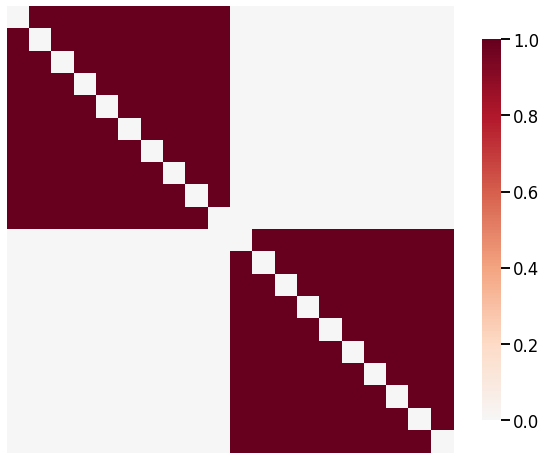

In [3]:
n = [10, 10]
p = np.eye(2)
wt = [[normal, poisson],
      [poisson, normal]]
wtargs = [[dict(loc=3, scale=1), dict(lam=5)],
          [dict(lam=5), dict(loc=3, scale=1)]]

# B = sbm(n=n, p=p, 
#         wt=wt, wtargs=wtargs)
Guw = sbm(n=n, p=p)
Gw = sbm(n=n, p=p, wt=wt, wtargs=wtargs)
Guwd = sbm(n=n, p=p, directed=True)
Gwd = sbm(n=n, p=p, wt=wt, wtargs=wtargs, directed=True)

heatmap(Guw)

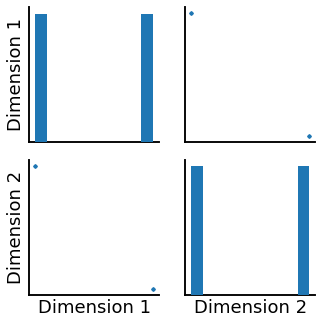

In [4]:
# plot
ase = ASE(n_components=2)
Xhat = ase.fit_transform(Guw)

pairplot(Xhat)

In [5]:
np.round(Xhat)

array([[ 1., -0.],
       [ 1., -0.],
       [ 1., -0.],
       [ 1., -0.],
       [ 1., -0.],
       [ 1., -0.],
       [ 1., -0.],
       [ 1., -0.],
       [ 1., -0.],
       [ 1., -0.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.]])

<AxesSubplot:>

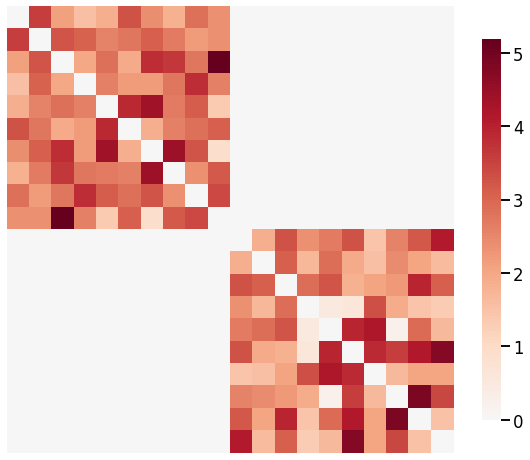

In [6]:
heatmap(Gw)

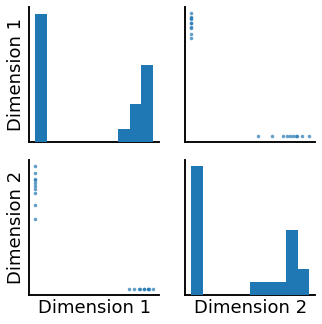

In [7]:
ase = ASE(n_components=2)
Xhat = ase.fit_transform(Gw)

pairplot(Xhat)

In [8]:
np.round(Xhat)

array([[ 1., -0.],
       [ 2.,  0.],
       [ 2.,  0.],
       [ 1., -0.],
       [ 2.,  0.],
       [ 2., -0.],
       [ 2.,  0.],
       [ 2., -0.],
       [ 2., -0.],
       [ 2., -0.],
       [ 0.,  2.],
       [ 0.,  1.],
       [ 0.,  2.],
       [ 0.,  1.],
       [ 0.,  2.],
       [-0.,  2.],
       [ 0.,  1.],
       [ 0.,  2.],
       [ 0.,  2.],
       [ 0.,  2.]])

In [9]:
Gw.shape

(20, 20)

In [10]:
remove_vertices(Gw, 1, return_vertices=True)

(array([[0.        , 2.11009715, 1.548154  , 1.877163  , 3.29367817,
         2.40605545, 1.83670388, 2.85355161, 2.35959032, 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        ],
        [2.11009715, 0.        , 1.99188173, 2.85317203, 1.96174862,
         3.83284691, 3.67079091, 2.78930552, 5.18404712, 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        ],
        [1.548154  , 1.99188173, 0.        , 2.60785207, 2.19889948,
         2.22375485, 2.77619685, 3.83202309, 2.61245867, 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        ],
        [1.877163  , 2.85317203, 2.60785207, 0.        , 3.88844002,
         4.40309499, 2.69942724, 3.13848583, 1.35938084, 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        

## Tests for remove_vertices

In [11]:
np.__version__

'1.19.1'

In [12]:
# testing remove_vertices
from graspologic.utils import is_almost_symmetric, import_graph, symmetrize

def remove_vertices(graph, indices, return_vertices=False):
    # type checks
    directed = not is_almost_symmetric(graph)
    graph = import_graph(graph)

    # truncate graph
    A = np.delete(np.delete(graph, indices, 0), indices, 1)

    # grab relevant vertices
    if return_vertices:
        rows = np.delete(graph, indices, axis=0)
        vertices = rows[:, indices].T
        if directed:
            cols = np.delete(graph, indices, axis=1)
            vertices_right = cols[indices, :]
            return A, (vertices, vertices_right)
        return A, vertices
    return A

# generate data (undirected)
G = np.arange(1, 26).reshape(5, 5)
G = symmetrize(G, method='tril')
G[np.diag_indices(len(G))] = 0

# tests (undirected)
vertices = [0, -1, 1]
A, a = remove_vertices(G, indices=vertices, return_vertices=True)
assert np.array_equal(A, np.array([[0, 18], [18, 0]]))
assert np.array_equal(a, np.array([[11, 16],
                                   [23, 24],
                                   [12, 17]]))

# with integer index
A, a = remove_vertices(G, indices=0, return_vertices=True)
assert np.array_equal(A, G[1:, 1:])
assert np.array_equal(a, np.array([6, 11, 16, 21]))

assert np.array_equal(remove_vertices(G, 0), remove_vertices(G, [0]))

# directed case
G = np.arange(1, 26).reshape(5, 5)
G[np.diag_indices(len(G))] = 0
A, a = remove_vertices(G, indices=vertices, return_vertices=True)
assert np.array_equal(A, np.array([[0, 14], [18, 0]]))
assert np.array_equal(a[0], np.array([[11, 16],
                                      [15, 20],
                                      [12, 17]]))
assert np.array_equal(a[1], np.array([[3, 4],
                                      [23, 24],
                                      [8, 9]]))


In [13]:
a

(array([[11., 16.],
        [15., 20.],
        [12., 17.]]),
 array([[ 3.,  4.],
        [23., 24.],
        [ 8.,  9.]]))

In [14]:
G

array([[ 0,  2,  3,  4,  5],
       [ 6,  0,  8,  9, 10],
       [11, 12,  0, 14, 15],
       [16, 17, 18,  0, 20],
       [21, 22, 23, 24,  0]])

## Tests for ASE

In [15]:
from graspologic.embed import AdjacencySpectralEmbed as ASE
from sklearn.utils.estimator_checks import check_estimator

In [16]:
?check_estimator

Signature: check_estimator(Estimator, generate_only=False)
Docstring:
Check if estimator adheres to scikit-learn conventions.

This estimator will run an extensive test-suite for input validation,
shapes, etc, making sure that the estimator complies with `scikit-learn`
conventions as detailed in :ref:`rolling_your_own_estimator`.
Additional tests for classifiers, regressors, clustering or transformers
will be run if the Estimator class inherits from the corresponding mixin
from sklearn.base.

This test can be applied to classes or instances.
Classes currently have some additional tests that related to construction,
while passing instances allows the testing of multiple options. However,
support for classes is deprecated since version 0.23 and will be removed
in version 0.24 (class checks will still be run on the instances).

Setting `generate_only=True` returns a generator that yields (estimator,
check) tuples where the check can be called independently from each
other, i.e. `check(est